In [1]:
library(forecast)
library(fpp2)

train <- window(auscafe, end=c(2012,9))
h <- length(auscafe)-length(train)

ETS <- forecast(ets(train),h=h)
ARIMA <- forecast(auto.arima(train, lambda=0), h=h)
STL <- stlf(train,lambda=0,h=h)
NNAR <- forecast(nnetar(train),h=h)
Combination <- (ETS[["mean"]]+ARIMA[["mean"]]+STL[["mean"]]+NNAR[["mean"]])/4

Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'fpp2' was built under R version 3.6.3"
Loading required package: ggplot2

Loading required package: fma

Warning message:
"package 'fma' was built under R version 3.6.3"
Loading required package: expsmooth

Warning message:
"package 'expsmooth' was built under R version 3.6.3"


In [2]:
c(ETS=accuracy(ETS,auscafe)["Test set","RMSE"], ARIMA=accuracy(ARIMA,auscafe)["Test set","RMSE"],STLETS=accuracy(STL,auscafe)["Test set","RMSE"], NNAR=accuracy(NNAR,auscafe)["Test set","RMSE"], Combination=accuracy(Combination,auscafe)["Test set","RMSE"])

ETS       ARIMA      STLETS        NNAR Combination 
 0.13699696  0.12069109  0.20122724  0.30974340  0.07682614

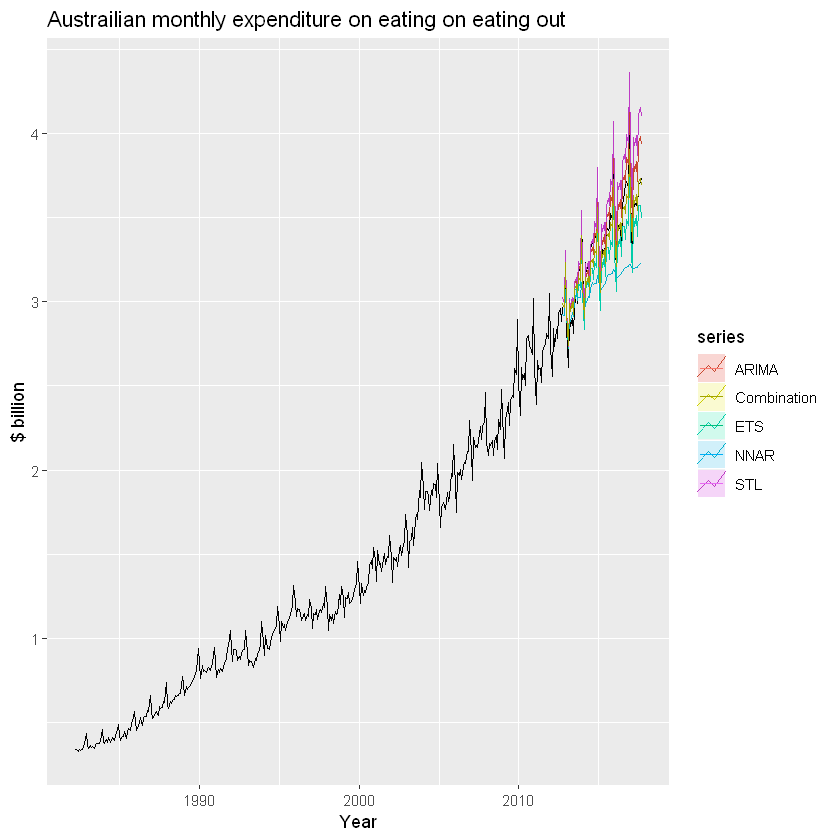

In [3]:
library(ggplot2)

autoplot(auscafe) + autolayer(ETS,series="ETS",PI=FALSE) + autolayer(ARIMA,series="ARIMA",PI=FALSE) + autolayer(STL,series="STL",PI=FALSE) + autolayer(NNAR,series="NNAR",PI=FALSE) + autolayer(Combination, series="Combination") + xlab("Year") + ylab("$ billion") + ggtitle("Austrailian monthly expenditure on eating on eating out")